In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [3]:
x,y = sp.symbols('x y')

fn = (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2
grad_x = sp.diff(fn,x)
grad_y = sp.diff(fn,y)

grad_x = sp.lambdify((x,y),grad_x,modules='numpy')
grad_y = sp.lambdify((x,y),grad_y,modules='numpy')
fn = sp.lambdify((x,y),fn,modules='numpy')

def grad(fn,x_i,y_i):
  return np.array([grad_x(x_i,y_i),grad_y(x_i,y_i)])

In [6]:
def SGD(fn,x_i,y_i,lr,epochs):
  history = []
  history.append((x_i,y_i,fn(x_i,y_i)))
  for _ in range(epochs):
    gradient = grad(fn,x_i,y_i)

    x_i = x_i - lr*gradient[0]
    y_i = y_i - lr*gradient[1]

    history.append((x_i,y_i,fn(x_i,y_i)))

  return x_i,y_i,history

In [10]:
def MGD(fn,x_i,y_i,lr,epochs,momentum):
  history = []
  history.append((x_i,y_i,fn(x_i,y_i)))
  v_x = v_y =0.0
  for _ in range(epochs):
    gradient = grad(fn,x_i,y_i)
    v_x = momentum * v_x + lr * gradient[0]
    v_y = momentum *v_y +lr*gradient[1]
    x_i = x_i - v_x
    y_i = y_i -v_y

    history.append((x_i,y_i,fn(x_i,y_i)))

  return x_i,y_i,history

In [23]:
def Adagrad(fn,x_i,y_i,lr,epochs,ephsilon):
  history = []
  history.append((x_i,y_i,fn(x_i,y_i)))
  v_x = v_y =0.0

  for _ in range(epochs):
    gradient = grad(fn,x_i,y_i)
    v_x = v_x + gradient[0]**2
    v_y = v_y +gradient[1]**2

    x_i = x_i - lr/(v_x**0.5+ephsilon)*gradient[0]
    y_i = y_i - lr/(v_y**0.5 + ephsilon)*gradient[1]

    history.append((x_i,y_i,fn(x_i,y_i)))

  return x_i,y_i,history

In [24]:
x_op,y_op,history_sgd = SGD(fn,1.0,1.0,0.01,1000);
print("x_op :",x_op,"\ny_op :",y_op,"\nFunction :",fn(x_op,y_op))

x_op : 2.982252031873145 
y_op : 0.49553568854239105 
Function : 5.144595844422444e-05


In [25]:
x_op,y_op,history_mgd = MGD(fn,1.0,1.0,0.01,1000,0.9);
print("x_op :",x_op,"\ny_op :",y_op,"\nFunction :",fn(x_op,y_op))

x_op : 2.9999999999999973 
y_op : 0.49999999999999917 
Function : 7.136148222938025e-30


In [28]:
x_op,y_op,history_ada = Adagrad(fn,1.0,1.0,0.01,1000000,0.001)
print(f"x_op : {x_op:.4f} y_op:{y_op:.4f}  f =  {fn(x_op,y_op):.4f}")

x_op : 3.0000 y_op:0.5000  f =  0.0000


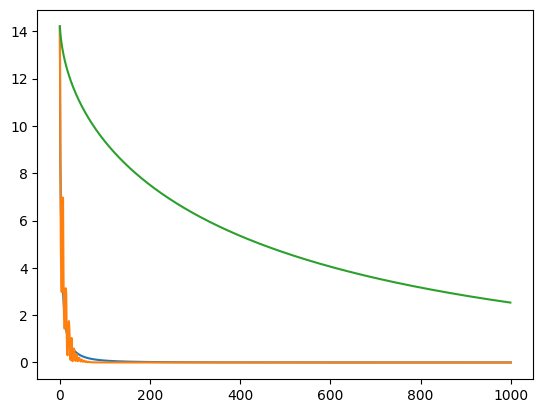

In [31]:
plt.plot([h[2] for h in history_sgd],label='SGD')
plt.plot([h[2] for h in history_mgd],label='MGD')
plt.plot([h[2] for h in history_ada[:1000]],label='Ada')
plt.show()